<a href="https://colab.research.google.com/github/ahoucbvtw/RegiFamily_shinny/blob/master/Shinny_RegiFamily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 解壓縮圖片所在的zip檔
import zipfile
path = "./379.zip"
f = zipfile.ZipFile(path)
f.extractall("pokemon")

In [2]:
import pandas as pd
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 建立答案的數字轉換
trans = [
        "沒閃",										
        "閃"
]

In [ ]:
# shutil.rmtree("./pokemon")

In [4]:
path_Train = "./pokemon/Train"
path_Test = "./pokemon/Validation"

In [5]:
# 圖片預處理(製作Python產生器)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 製作一產生器將圖片Normalize
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   zoom_range = 0.4,
                                   rotation_range = 30,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   fill_mode = "nearest")

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        path_Train,
        target_size = (300, 300),
        batch_size = 20,
        class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(
        path_Test,
        target_size = (300, 300),
        batch_size = 20,
        class_mode = 'categorical')

Found 392 images belonging to 2 classes.
Found 226 images belonging to 2 classes.


In [6]:
# 顯示generator內部自行標記的Label編號
label_map_train = (train_generator.class_indices)
label_map_test = (test_generator.class_indices)
print(label_map_train)
print(label_map_test)

{'379': 0, '379s': 1}
{'379': 0, '379s': 1}


In [1]:
# 建立CNN網路層
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

layers = [
          Conv2D(64, 3, padding = "same", activation = "relu", input_shape = (300, 300, 3)),
          Conv2D(128, 3, padding = "same", activation = "relu"),
          MaxPooling2D(),
          Conv2D(128, 3, padding = "same", activation = "relu"),
          MaxPooling2D(),
          GlobalAveragePooling2D(),
          Dropout(0.5),
          Dense(50, activation="relu"),
          Dense(2, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 300, 128)     73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

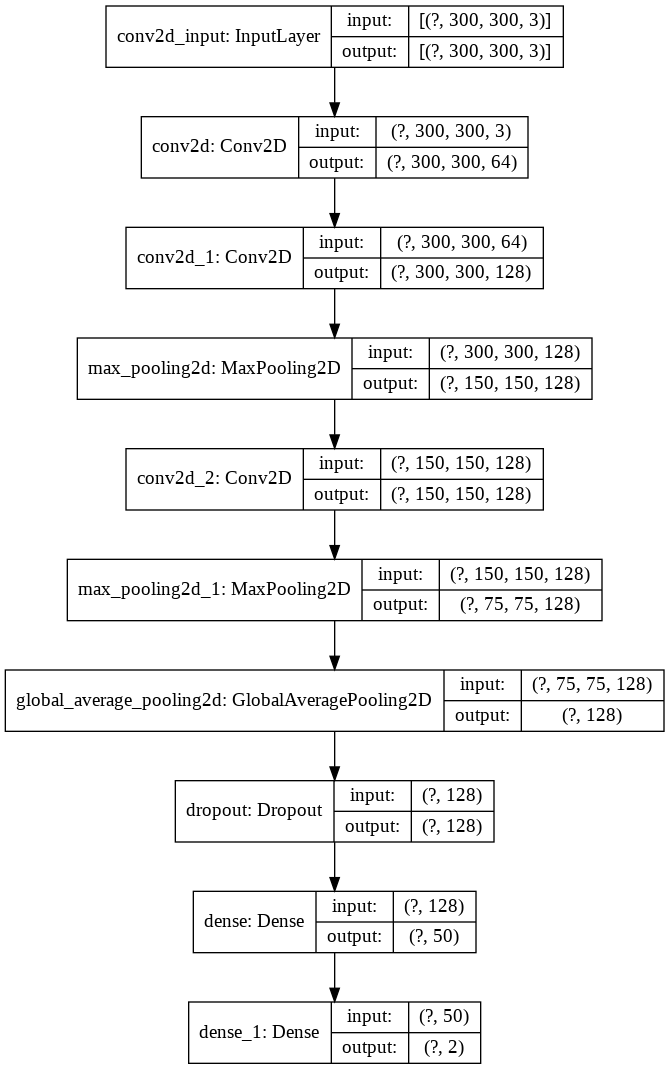

In [2]:
# 畫model的流程圖
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [13]:
# model comple
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [14]:
# Training

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# ReduceLROnPlateau 訓練到一定程度所指定的參數若未沒有甚麼變化，則減少其學習參數的效率
callbacks = [
    ModelCheckpoint("./379.h5", save_best_only = True),
    ReduceLROnPlateau(monitor = "val_accuracy", factor = 0.25, verbose = 1, patience = 7, min_lr = 0.001),
    EarlyStopping(patience = 8, restore_best_weights = True)
]

history = model.fit_generator(train_generator,
                    steps_per_epoch = 20,
                    epochs = 150,
                    verbose = 2,
                    validation_data = test_generator,
                    validation_steps = 12,
                    callbacks = callbacks)


# history = model.fit(x = train_generator,
#                  steps_per_epoch = 468,
#                  epochs = 150,
#                  verbose = 2,
#                  validation_data = test_generator,
#                  validation_steps = 60,
#                  callbacks = callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/150
20/20 - 17s - loss: 0.4360 - accuracy: 0.7679 - val_loss: 0.2779 - val_accuracy: 0.8009
Epoch 2/150
20/20 - 16s - loss: 0.3191 - accuracy: 0.7704 - val_loss: 0.2248 - val_accuracy: 0.8009
Epoch 3/150
20/20 - 16s - loss: 0.2323 - accuracy: 0.9311 - val_loss: 0.1712 - val_accuracy: 0.8097
Epoch 4/150
20/20 - 16s - loss: 0.0873 - accuracy: 0.9745 - val_loss: 0.0416 - val_accuracy: 1.0000
Epoch 5/150
20/20 - 16s - loss: 0.0736 - accuracy: 0.9847 - val_loss: 0.0439 - val_accuracy: 1.0000
Epoch 6/150
20/20 - 15s - loss: 0.0784 - accuracy: 0.9719 - val_loss: 0.0846 - val_accuracy: 1.0000
Epoch 7/150
20/20 - 15s - loss: 0.0524 - accuracy: 0.9847 - val_loss: 0.0885 - val_accuracy: 1.0000
Epoch 8/150
20/20 - 15s - loss: 0.0759 - accuracy: 0.9821 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 9/150
20/20 - 15s - loss: 0.0733 - accuracy: 0.9847 - val_loss: 0.0296 - val_accuracy: 1.0000
Epoch 10/150
20/20 - 15s

In [20]:
# model.save("./379.h5")

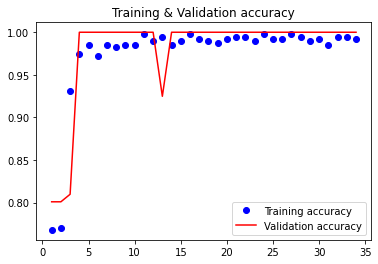

In [15]:
# 顯示隨著時間訓練Training準確率和Validation準確率的變化

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "r", label = "Validation accuracy")
plt.title("Training & Validation accuracy")
plt.legend()
plt.show()

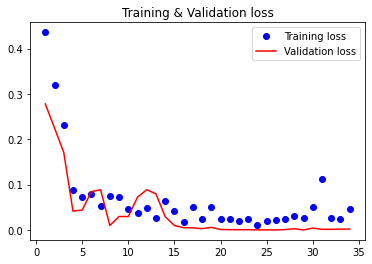

In [16]:
# 顯示隨著時間訓練Training loss和Validation loss的變化

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) +1)

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "r", label = "Validation loss")
plt.title("Training & Validation loss")
plt.legend()
plt.show()

In [17]:
epoch = []
for i in range(1, len(history.history["loss"]) +1):
    epoch.append(i)

history_df = pd.DataFrame({
    "epoch":epoch,
    "learning_rate": history.history["lr"],
    "loss": history.history["loss"],
    "accuracy": history.history["accuracy"],
    "val_loss": history.history["val_loss"],
    "val_accuracy": history.history["val_accuracy"]
})
history_df.to_csv("379.csv", index = False)
history_df

,epoch,learning_rate,loss,accuracy,val_loss,val_accuracy
0,1,0.001,0.436034,0.767857,0.277925,0.800885
1,2,0.001,0.319072,0.770408,0.224785,0.800885
2,3,0.001,0.232349,0.931122,0.171168,0.809735
3,4,0.001,0.087328,0.974490,0.041577,1.000000
4,5,0.001,0.073588,0.984694,0.043887,1.000000
5,6,0.001,0.078411,0.971939,0.084609,1.000000
6,7,0.001,0.052413,0.984694,0.088527,1.000000
7,8,0.001,0.075884,0.982143,0.009793,1.000000
8,9,0.001,0.073310,0.984694,0.029634,1.000000
9,10,0.001,0.045769,0.984694,0.029521,1.000000


[0.99618477 0.0038152 ]
沒閃 的機率: 0.996
閃 的機率: 0.004
最高機率: 沒閃


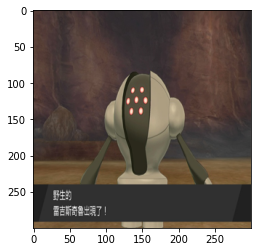

In [22]:
from PIL import Image
import numpy as np

img = Image.open("z1.jpg").resize((300, 300))
test = np.array(img).reshape(1, 300, 300, 3) / 255
p = model.predict(test)[0]
print(p)
for n, prob in zip(trans, p):
    print(n, "的機率:", round(prob, 3))
ans = model.predict_classes(test)[0]
print("最高機率:", trans[ans])
plt.imshow(img)